In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='whitegrid', font='monospace')

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1558 non-null   object 
 1   wins            1558 non-null   int64  
 2   kills           1558 non-null   int64  
 3   kdRatio         1558 non-null   float64
 4   killstreak      1558 non-null   int64  
 5   level           1558 non-null   int64  
 6   losses          1558 non-null   int64  
 7   prestige        1558 non-null   int64  
 8   hits            1558 non-null   int64  
 9   timePlayed      1558 non-null   int64  
 10  headshots       1558 non-null   int64  
 11  averageTime     1558 non-null   float64
 12  gamesPlayed     1558 non-null   int64  
 13  assists         1558 non-null   int64  
 14  misses          1558 non-null   int64  
 15  xp              1558 non-null   int64  
 16  scorePerMinute  1558 non-null   float64
 17  shots           1558 non-null   i

In [5]:
def plot_single_variable(data, var, color):
    q1, q3 = data[var].quantile(0.25), data[var].quantile(0.75)
    iqr = q3 - q1
    df_wo_outliers = data[(data[var] >= q1 - 1.5*iqr) & (data[var] <= q3 + 1.5*iqr)]
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    axes.ravel()[0].set_title('W/ Outliers')
    axes.ravel()[1].set_title('W/O Outliers')
  
    sns.histplot(data=df, x=var, kde=True, bins=60, color=color, alpha=0.7, ax=axes[0, 0])
    sns.histplot(data=df_wo_outliers, x=var, kde=True, bins=60, color=color, alpha=0.7, ax=axes[0, 1])
    sns.violinplot(data=df, x=var, color=color, alpha=0.7, ax=axes[1, 0])
    sns.violinplot(data=df_wo_outliers, x=var, color=color, alpha=0.7, ax=axes[1, 1])

## Single Variable Distributions (Existing Features)

---

### **Variables**: `wins` and `losses`

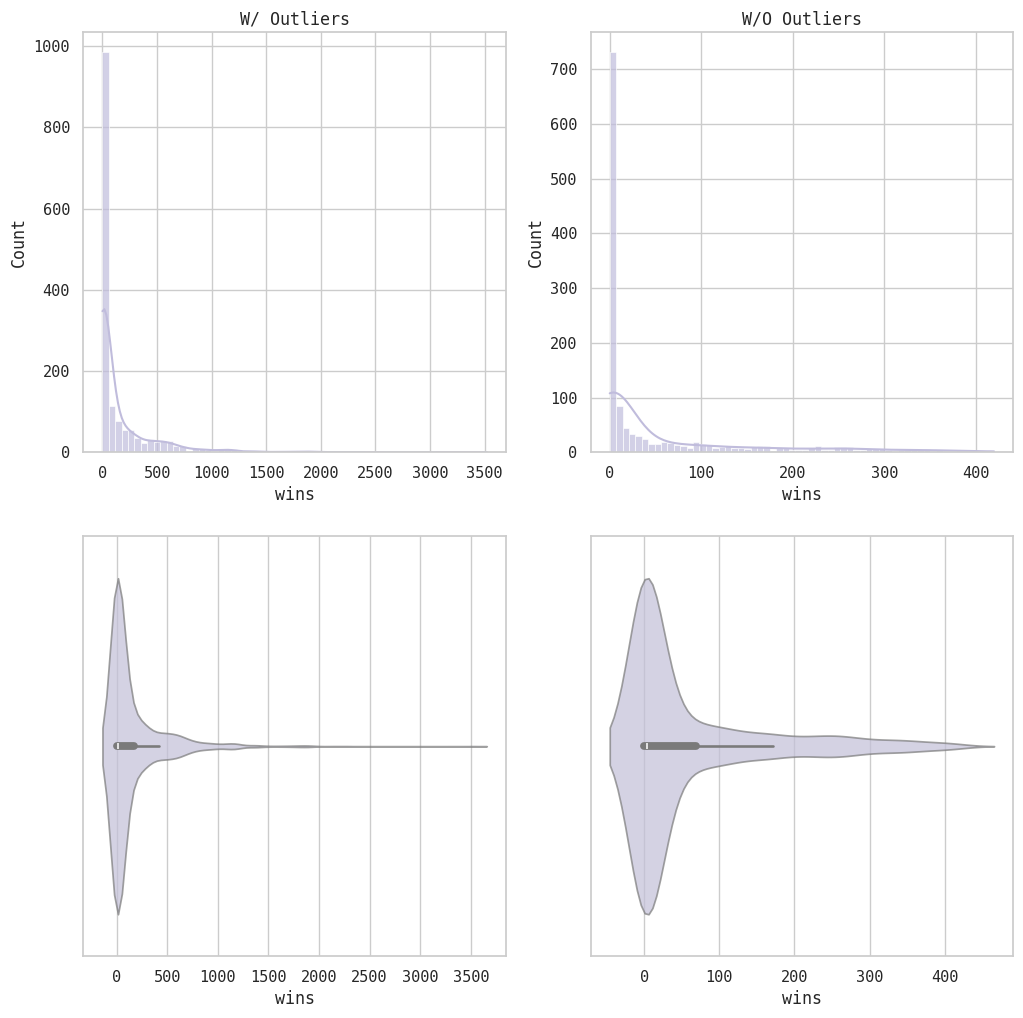

In [5]:
plot_single_variable(data=df, var='wins', color='#c0bcdc')

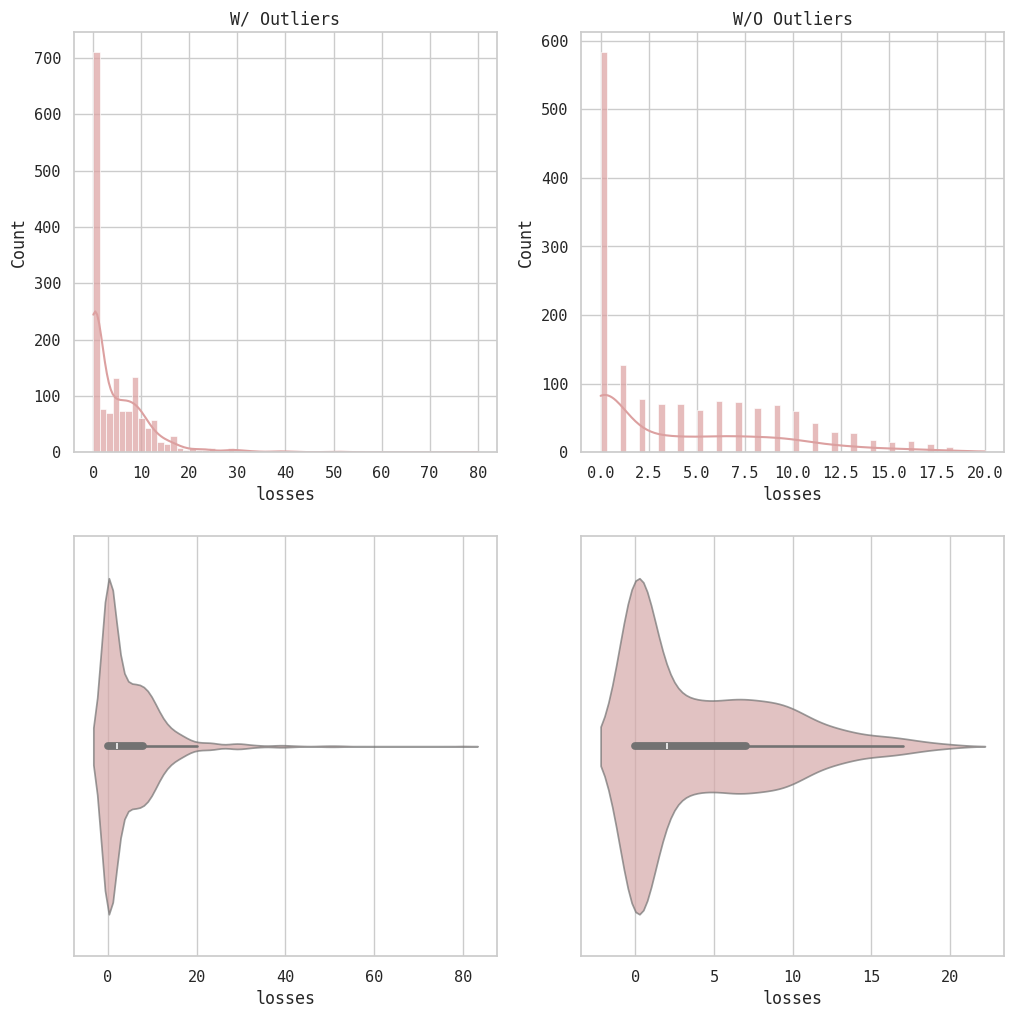

In [6]:
plot_single_variable(data=df, var='losses', color='#dca0a0')

### **Variables**: `kills`, `deaths`, `assists`, `kdRatio`, `scorePerMinute` and `killStreak`

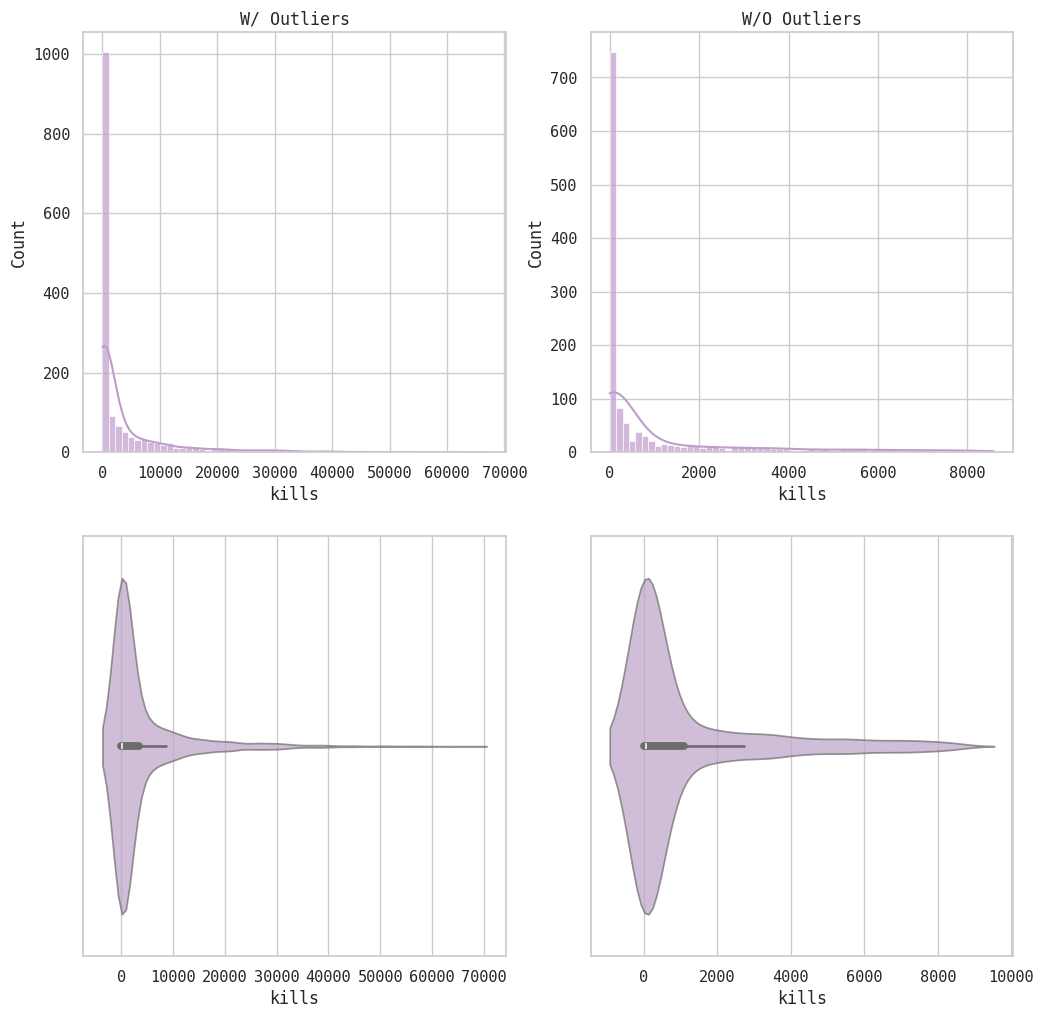

In [7]:
plot_single_variable(data=df, var='kills', color='#c09ccc')

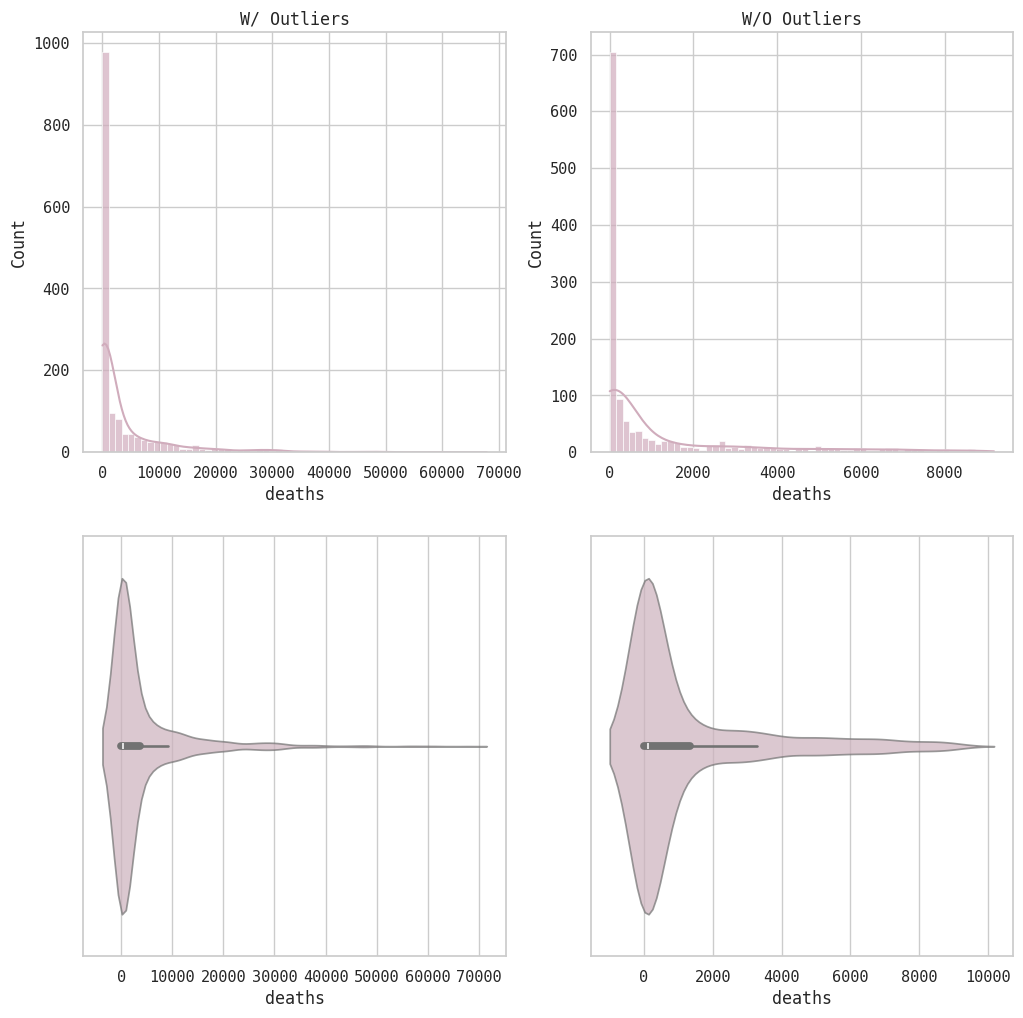

In [8]:
plot_single_variable(data=df, var='deaths', color='#d0acbc')

In [9]:
plot_single_variable(data=df, var='assists', color='#a0dcbc')

Error in callback <function flush_figures at 0x7575e9851800> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

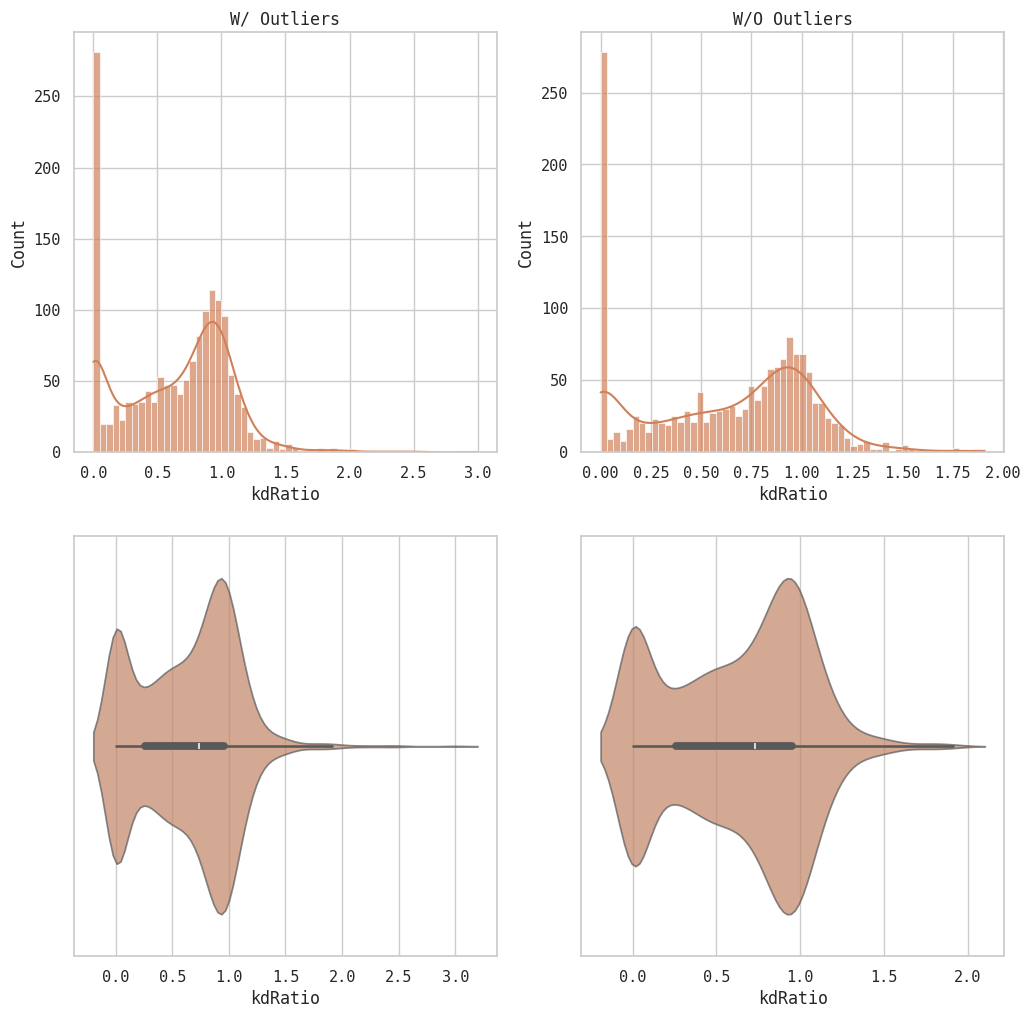

In [10]:
plot_single_variable(data=df, var='kdRatio', color='#d08058')

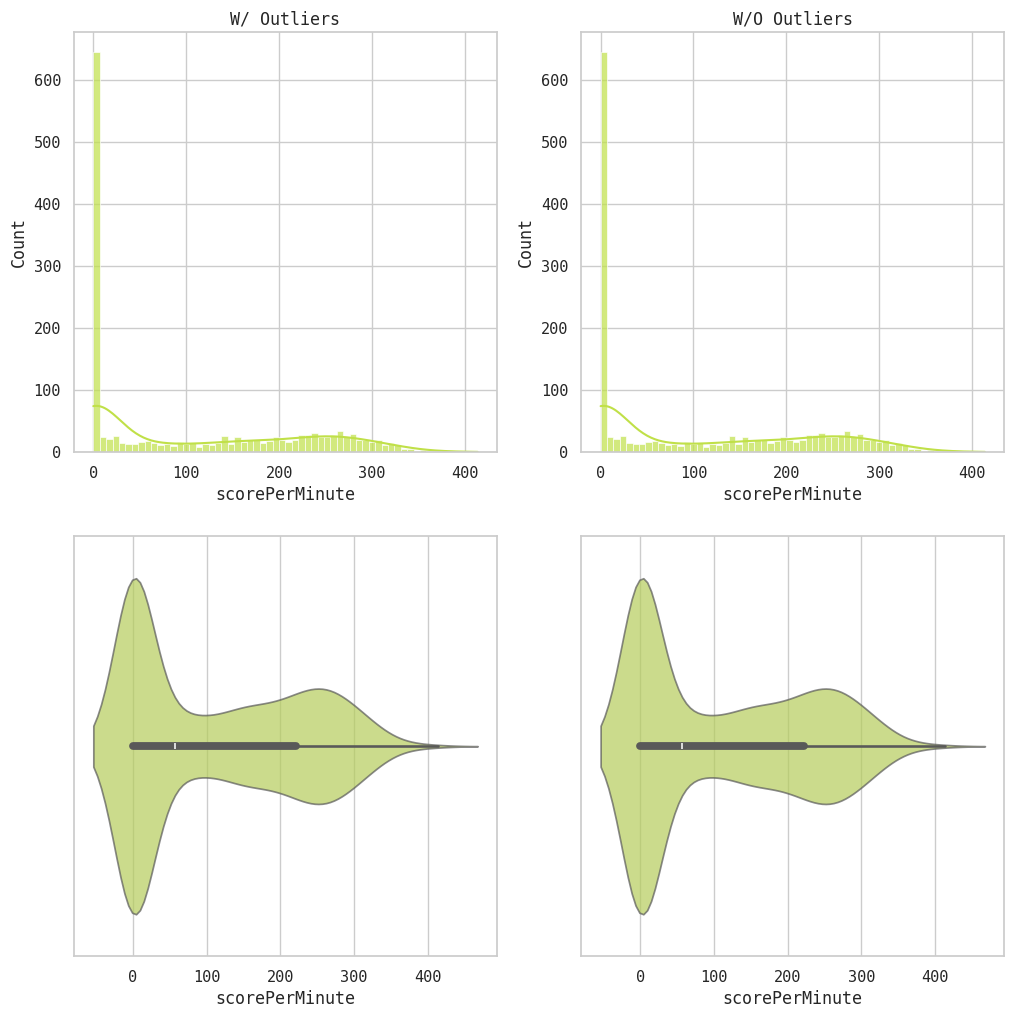

In [11]:
plot_single_variable(data=df, var='scorePerMinute', color='#c0e048')

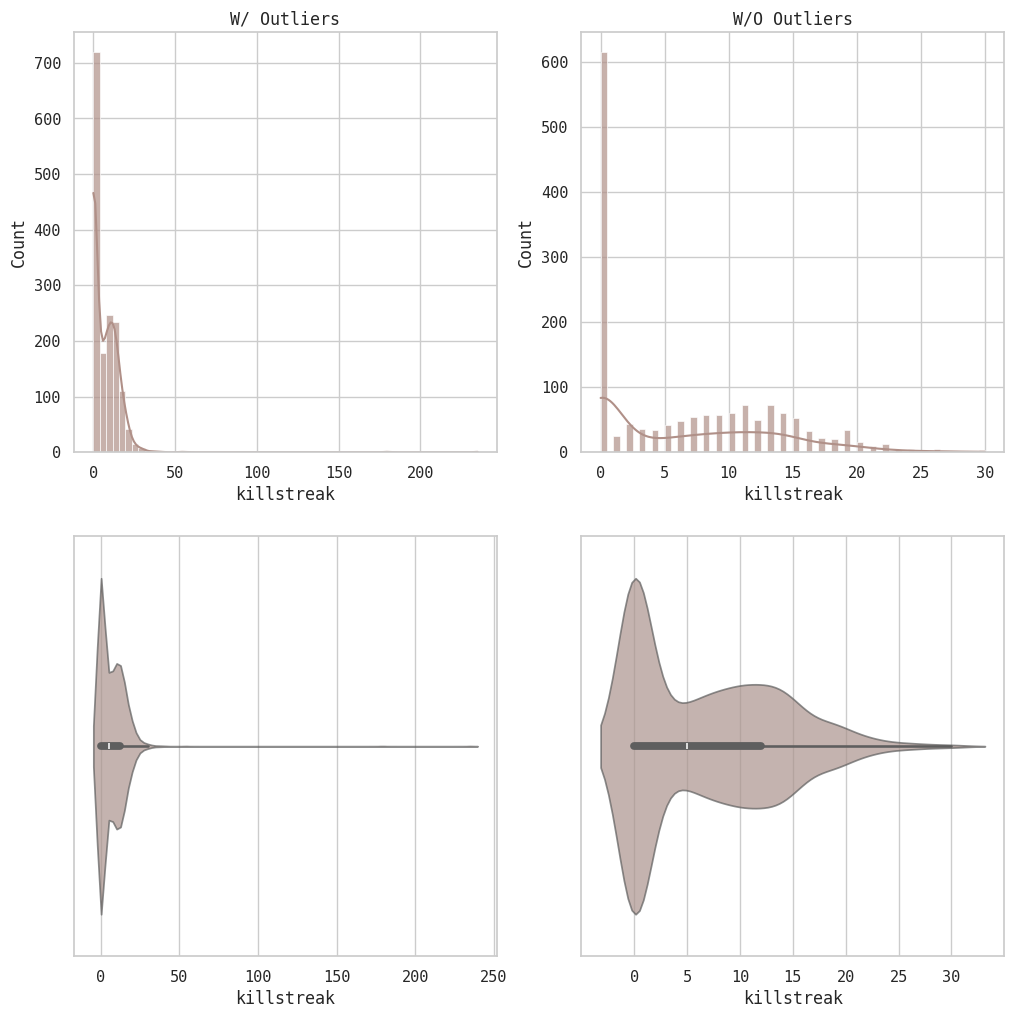

In [12]:
plot_single_variable(data=df, var='killstreak', color='#b09088')

### **Variables**: `level`, `prestige`, and `xp`

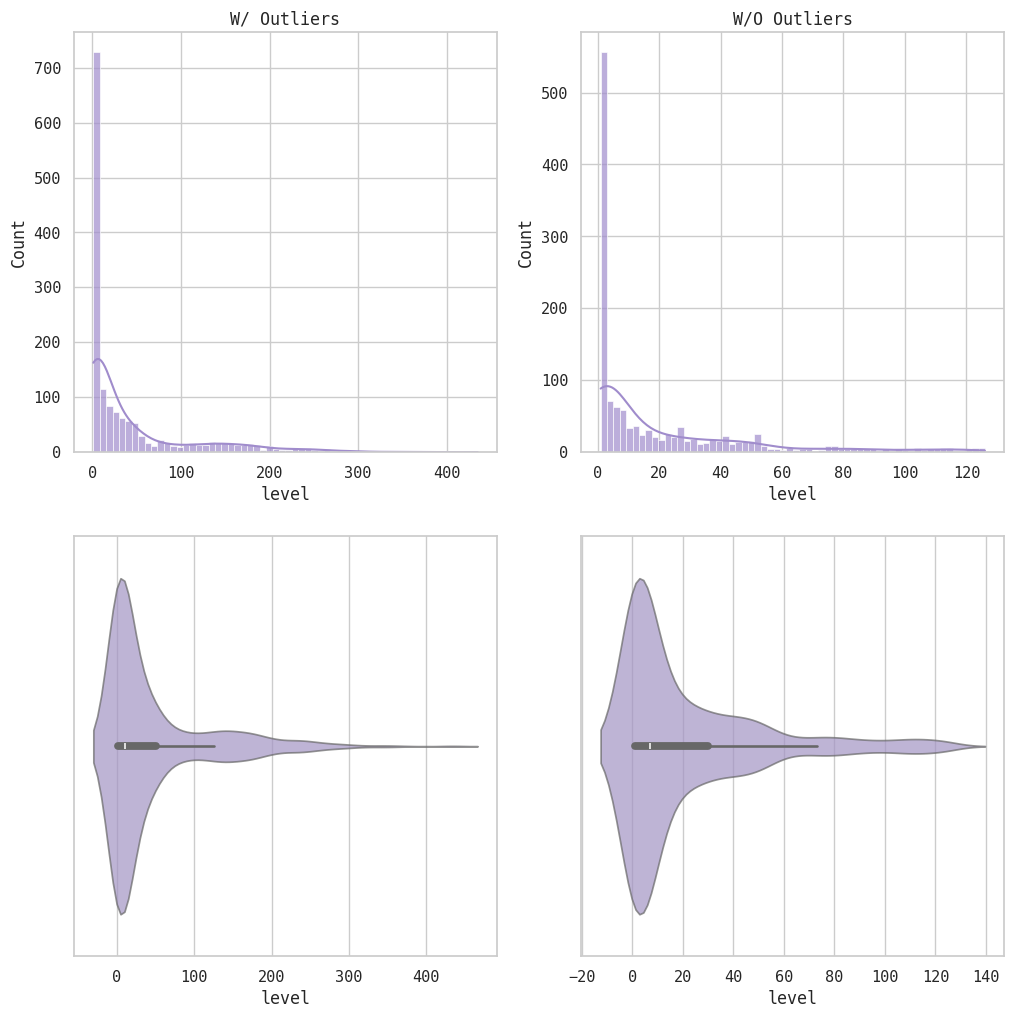

In [13]:
plot_single_variable(data=df, var='level', color='#a08ccc')

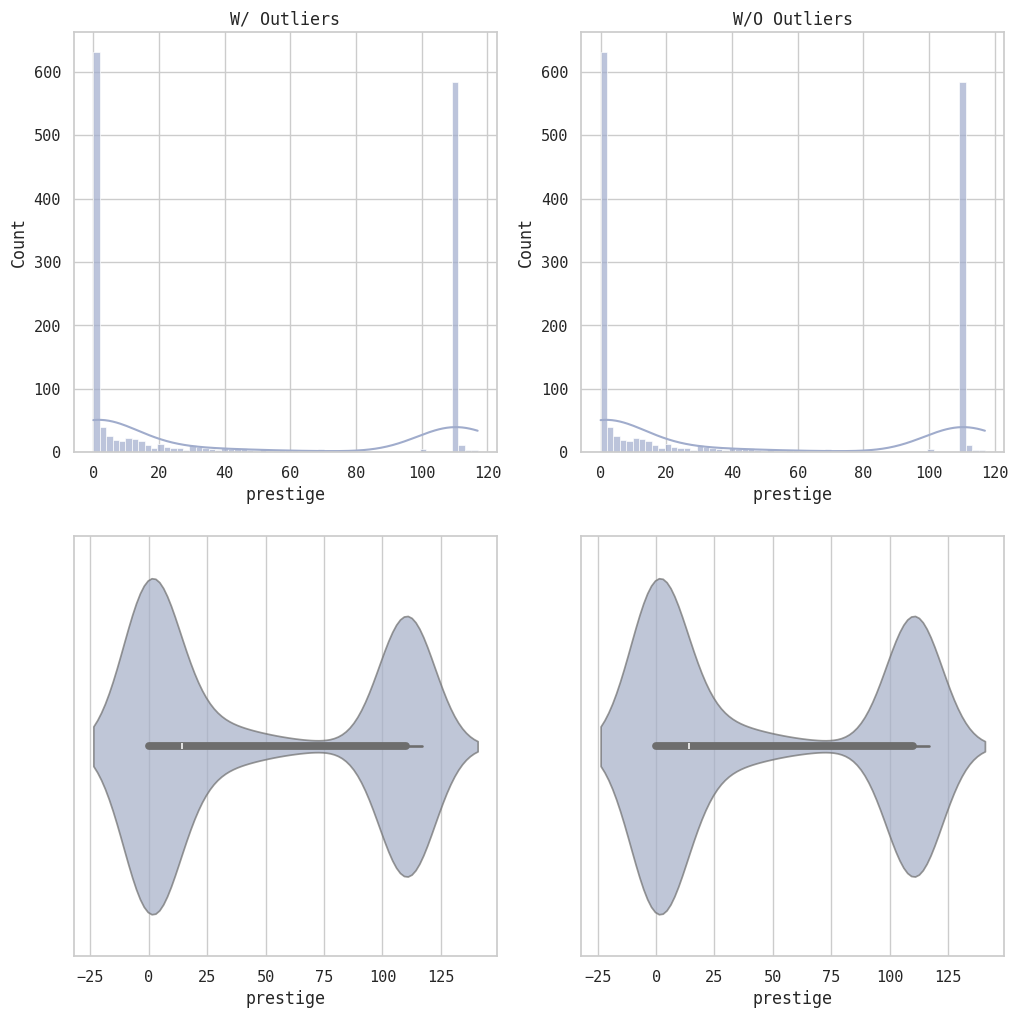

In [14]:
plot_single_variable(data=df, var='prestige', color='#a0accc')

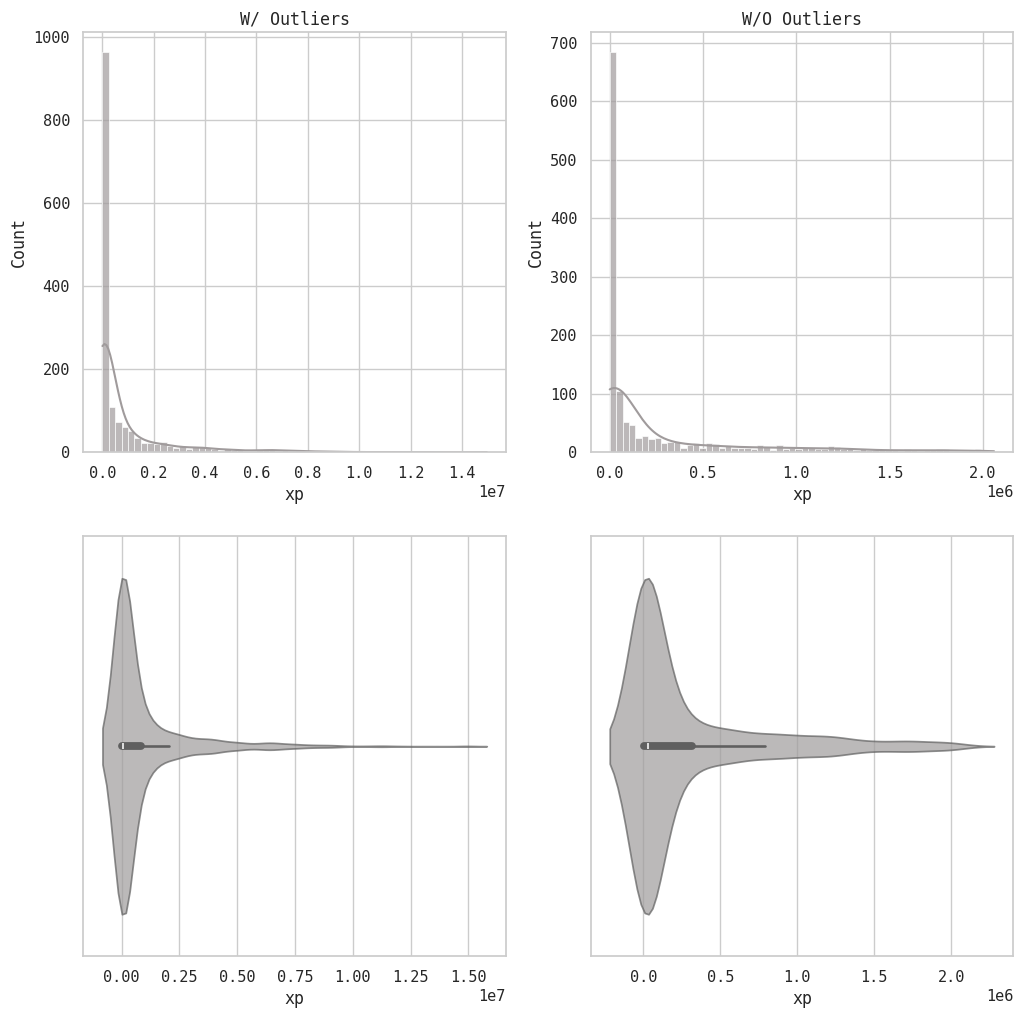

In [15]:
plot_single_variable(data=df, var='xp', color='#a09b9c')

### **Variables**: `hits`, `misses`, `headshots` and `shots`

> Note that `shots` is the sum of `hits` and `misses`.

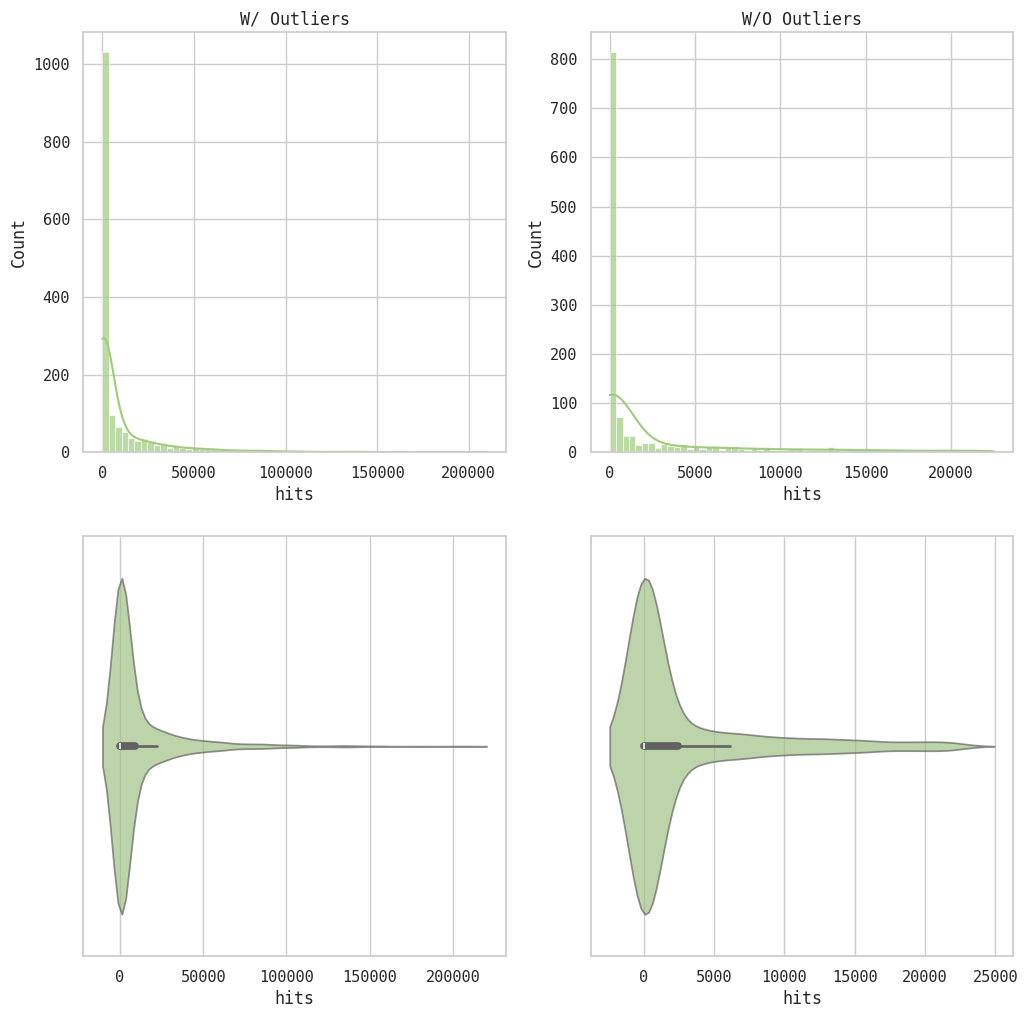

In [16]:
plot_single_variable(data=df, var='hits', color='#a0cb7c')

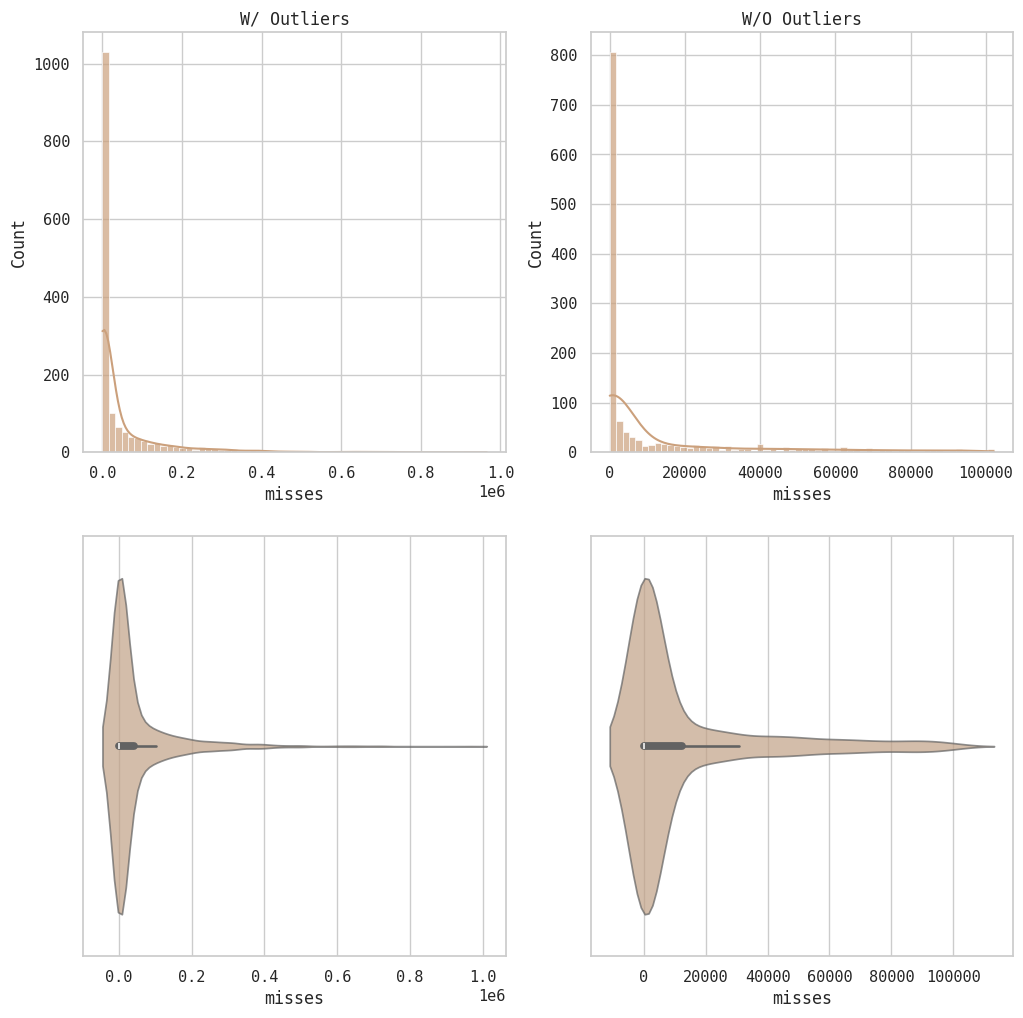

In [17]:
plot_single_variable(data=df, var='misses', color='#cba07c')

In [ ]:
plot_single_variable(data=df, var='headshots', color='#88c0ab')

In [ ]:
plot_single_variable(data=df, var='shots', color='#cbcb90')

### **Variables**: `timePlayed`, `averageTime`, and `gamesPlayed`

In [ ]:
plot_single_variable(data=df, var='timePlayed', color='#80bb80')

In [ ]:
plot_single_variable(data=df, var='averageTime', color='#90aaaa')

In [ ]:
plot_single_variable(data=df, var='gamesPlayed', color='#b0aa90')

## Single Variable Distributions (Engineered Features)

---

### Definitions

- `winRate`: `wins` / (`wins` + `loses`)
- `winRateAlt` : `winRate` * ln(`gamesPlayed`)
- `killsPerGame` : `kills` / `gamesPlayed`
- `deathsPerGame` : `deaths` / `gamesPlayed`
- `assistsPerGame` : `assists` / `gamesPlayed`
- `hitRate`: `hits` / `shots`
- `headshotRate` : `headshots` / `shots`

In [6]:
df['winRate']        = df['wins'] / (df['wins'] + df['losses'])
df['winRateAlt']     = df['winRate'] * np.log2(df['gamesPlayed'])
df['killsPerGame']   = df['kills'] / df['gamesPlayed']
df['deathsPerGame']  = df['deaths'] / df['gamesPlayed']
df['assistsPerGame'] = df['assists'] / df['gamesPlayed']
df['hitRate']        = df['hits'] / df['shots']
df['headshotRate']   = df['headshots'] / df['shots']
df.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

In [ ]:
plot_single_variable(data=df, var='winRate', color='#b09ac0')

In [ ]:
plot_single_variable(data=df, var='winRateAlt', color='#b09ac0')

In [ ]:
plot_single_variable(data=df, var='killsPerGame', color='#a0ca90')

In [ ]:
plot_single_variable(data=df, var='deathsPerGame', color='#c8a790')

In [ ]:
plot_single_variable(data=df, var='assistsPerGame', color='#c8b760')

In [ ]:
plot_single_variable(data=df, var='hitRate', color='#b0da90')

In [ ]:
plot_single_variable(data=df, var='headshotRate', color='#90cab0')

## Preliminary Analysis

---

- How might we predict `kdRatio`?
- How might we predict `winRateAlt`?

### Suggested Predictors

- `level`
- `prestige`
- `xp`
- `hitRate`
- `timePlayed`
- `averageTime`
- `gamesPlayed`
- `headshotRate`
- `assistsPerGame`

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
def model_evaluation(df, predictors, target, model_instance):
    df_train, df_test = train_test_split(df, test_size=0.2)
    model = model_instance.fit(df_train[predictors], df_train[[target]])
    
    pred_train, pred_test = model.predict(df_train[predictors]), model.predict(df_test[predictors])
    
    print(f'Train Set (r2)\t{r2_score(df_train[[target]], pred_train):.3f}')
    print(f'Test Set (MSE)\t{mean_squared_error(df_test[[target]], pred_test):.3f}')

### **Target Variable**: `kdRatio`

In [8]:
predictors = [
    'level',
    'prestige',
    'xp', 
    'hitRate',
    'timePlayed',
    'averageTime',
    'gamesPlayed',
    'headshotRate',
    'assistsPerGame'
]
target = 'kdRatio'

In [9]:
correlations = [np.corrcoef(df[pred], df[target])[0][1] for pred in predictors]

In [10]:
print('<<- Predictors Ranked ->>\n')
for corr, pred in sorted(zip(correlations, predictors)):
    print(f'{pred:10}\t{corr:+.3f}')

<<- Predictors Ranked ->>

headshotRate	+0.023
averageTime	+0.072
assistsPerGame	+0.242
gamesPlayed	+0.361
prestige  	+0.390
timePlayed	+0.414
xp        	+0.427
level     	+0.513
hitRate   	+0.671


In [11]:
predictors_top_3 = [i[1] for i in sorted(zip(correlations, predictors))[-3:]]
predictors_top_3

['xp', 'level', 'hitRate']

In [12]:
print('<<- Univariate Prediction ->>')
for pred in predictors:
    print(f'\n|> {pred}')
    model_evaluation(df=df, predictors=[pred], target=target, model_instance=LinearRegression())

<<- Univariate Prediction ->>

|> level
Train Set (r2)	0.257
Test Set (MSE)	0.150

|> prestige
Train Set (r2)	0.160
Test Set (MSE)	0.165

|> xp
Train Set (r2)	0.168
Test Set (MSE)	0.123

|> hitRate
Train Set (r2)	0.432
Test Set (MSE)	0.086

|> timePlayed
Train Set (r2)	0.177
Test Set (MSE)	0.137

|> averageTime
Train Set (r2)	0.004
Test Set (MSE)	0.183

|> gamesPlayed
Train Set (r2)	0.122
Test Set (MSE)	0.144

|> headshotRate
Train Set (r2)	0.000
Test Set (MSE)	0.194

|> assistsPerGame
Train Set (r2)	0.058
Test Set (MSE)	0.157


In [13]:
print('<<- Multivariate Prediction ->>')
print('\n|> predictors (all)')
model_evaluation(df=df, predictors=predictors, target=target, model_instance=LinearRegression())
print('\n|> predictors (top 3)')
model_evaluation(df=df, predictors=predictors_top_3, target=target, model_instance=LinearRegression())

<<- Multivariate Prediction ->>

|> predictors (all)
Train Set (r2)	0.542
Test Set (MSE)	0.071

|> predictors (top 3)
Train Set (r2)	0.523
Test Set (MSE)	0.090


### **Target Variable**: `winRateAlt`

In [10]:
predictors = [
    'level',
    'prestige',
    'xp', 
    'hitRate',
    'timePlayed',
    'averageTime',
    'gamesPlayed',
    'headshotRate',
    'assistsPerGame'
]
target = 'winRateAlt'

In [15]:
correlations = [np.corrcoef(df[pred], df[target])[0][1] for pred in predictors]

In [16]:
print('<<- Predictors Ranked ->>\n')
for corr, pred in sorted(zip(correlations, predictors)):
    print(f'{pred:10}\t{corr:+.3f}')

<<- Predictors Ranked ->>

averageTime	-0.163
headshotRate	-0.051
assistsPerGame	+0.160
prestige  	+0.430
xp        	+0.671
hitRate   	+0.707
gamesPlayed	+0.733
timePlayed	+0.734
level     	+0.777


In [17]:
predictors_top_3 = [i[1] for i in sorted(zip(correlations, predictors))[-3:]]
predictors_top_3

['gamesPlayed', 'timePlayed', 'level']

In [18]:
print('<<- Univariate Prediction ->>')
for pred in predictors:
    print(f'\n|> {pred}')
    model_evaluation(df=df, predictors=[pred], target=target, model_instance=LinearRegression())

<<- Univariate Prediction ->>

|> level
Train Set (r2)	0.600
Test Set (MSE)	4.584

|> prestige
Train Set (r2)	0.185
Test Set (MSE)	9.669

|> xp
Train Set (r2)	0.453
Test Set (MSE)	6.897

|> hitRate
Train Set (r2)	0.493
Test Set (MSE)	5.335

|> timePlayed
Train Set (r2)	0.534
Test Set (MSE)	5.786

|> averageTime
Train Set (r2)	0.026
Test Set (MSE)	11.504

|> gamesPlayed
Train Set (r2)	0.534
Test Set (MSE)	5.221

|> headshotRate
Train Set (r2)	0.003
Test Set (MSE)	12.528

|> assistsPerGame
Train Set (r2)	0.020
Test Set (MSE)	11.950


In [19]:
print('<<- Multivariate Prediction ->>')
print('\n|> predictors (all)')
model_evaluation(df=df, predictors=predictors, target=target, model_instance=LinearRegression())
print('\n|> predictors (top 3)')
model_evaluation(df=df, predictors=predictors_top_3, target=target, model_instance=LinearRegression())

<<- Multivariate Prediction ->>

|> predictors (all)
Train Set (r2)	0.880
Test Set (MSE)	1.612

|> predictors (top 3)
Train Set (r2)	0.664
Test Set (MSE)	3.713


### Grid Search (w/ Cross Validation)

---

In [33]:
def model_evaluation_w_grid_search(df, predictors, target, model_instance, param_grid, cv):
    df_train, df_test = train_test_split(df, test_size=0.2)
    model = GridSearchCV(estimator=model_instance, param_grid=param_grid, cv=cv, scoring='r2')
    model.fit(df_train[predictors], df_train[[target]])
    
    print('<<- Grid Search Results (Best Parameters) ->>')
    for k, v in model.best_params_.items():
       print(f'{k}\t{v}')
    print()
    
    pred_train, pred_test = model.predict(df_train[predictors]), model.predict(df_test[predictors])
    
    print(f'Train Set (r2)\t{r2_score(df_train[[target]], pred_train):.3f}')
    print(f'Test Set (MSE)\t{mean_squared_error(df_test[[target]], pred_test):.3f}')

In [34]:
predictors = [
    'level',
    'prestige',
    'xp', 
    'hitRate',
    'timePlayed',
    'averageTime',
    'gamesPlayed',
    'headshotRate',
    'assistsPerGame'
]
target = 'kdRatio'

In [35]:
param_grid = {
    # 'kernel': ['linear', 'poly'],
    'C': [1.0, 2.0, 3.0, 4.0, 5.0],
}

model_evaluation_w_grid_search(
    df=df,
    predictors=predictors,
    target=target,
    model_instance=SVR(),
    param_grid=param_grid,
    cv=3
)

<<- Grid Search Results (Best Parameters) ->>
C	5.0

Train Set (r2)	0.443
Test Set (MSE)	0.101
